<a href="https://colab.research.google.com/github/Vishalraj-Ravikumar/Project/blob/main/Reading_and_understanding_of_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Reading and understanding of dataframe**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
#Reading the csv file
ad=pd.read_csv("advertising.csv")
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
ad.shape

(200, 4)

In [ ]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#importing necessary visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

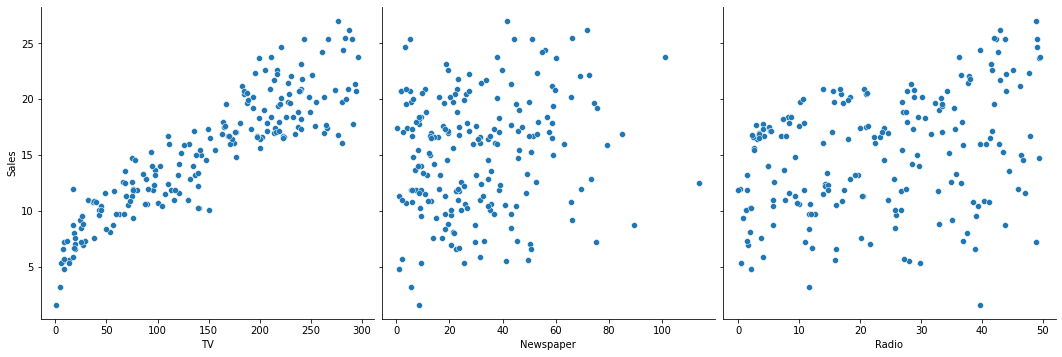

In [ ]:
sns.pairplot(ad,x_vars=['TV','Newspaper','Radio'],y_vars=['Sales'],height=5,aspect=1,kind='scatter')
plt.show()

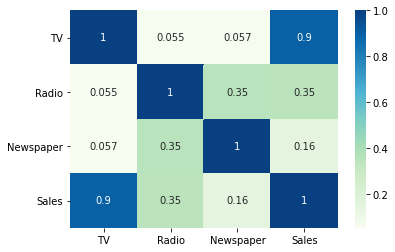

In [ ]:

sns.heatmap(ad.corr(),cmap='GnBu',annot=True)
plt.show()

In [ ]:
x=ad['TV']
y=ad['Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
x_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [ ]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_train_sm=sm.add_constant(x_train)

In [ ]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [ ]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.52e-52
Time:                        10:00:27   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

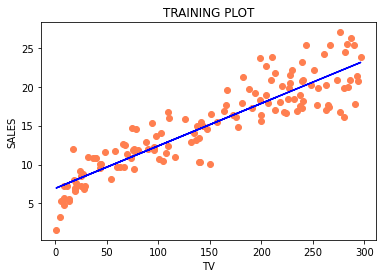

In [ ]:
plt.scatter(x_train,y_train, c='coral')
plt.plot(x_train,6.948683+0.054546*x_train,'b')
plt.xlabel("TV")
plt.ylabel("SALES")
plt.title("TRAINING PLOT")
plt.show()

# **Residual Analysis**

In [ ]:

y_train_pred=lr.predict(x_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [ ]:
residual=y_train-y_train_pred
residual

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

In [ ]:
fig=plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


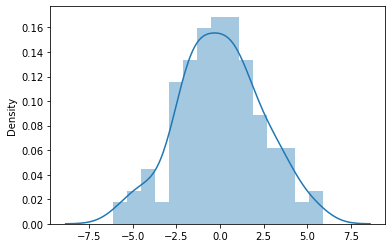

In [ ]:
sns.distplot(residual,bins=15)
plt.show()

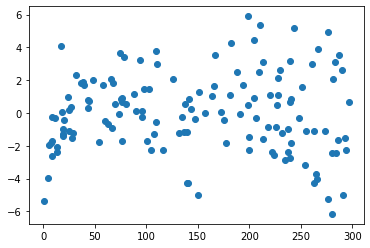

In [ ]:
plt.scatter(x_train,residual)
plt.show()

In [ ]:
x_test_sm=sm.add_constant(x_test)
y_test_pred=lr.predict(x_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fb17f2c06d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb17f2c6710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb17f2cf750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb17f2cf210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb17f2c0c50>,
  <matplotlib.lines.Line2D at 0x7fb17f2c61d0>]}

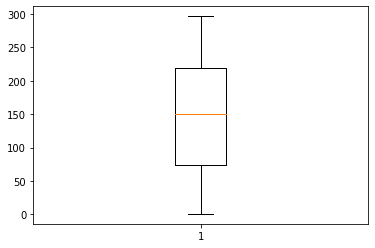

In [ ]:
plt.boxplot(x)